In [1]:
import os
import sys

project_dir = os.path.abspath('..')
sys.path.append(project_dir)

In [2]:
import logging
import torch
from src import utils, data

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

logger = utils.Logger(name='image_colorizer', level=logging.INFO, log_directory='../logs', log_file='log_file.log').get_logger()

input_filepath = '../data'
split_proportions = (0.7, 0.2, 0.1)
image_size = (256, 256)
logger = logger
class_list = ['n00006484', 'n00007846', 'n00440382', 'n00445055', 'n00447540']
images_per_class = 5
multiprocessing_workers = 5
batch_size = 10

loader = data.Loader(input_filepath=input_filepath, split_proportions=split_proportions, image_size=image_size, logger=logger, class_list=class_list, images_per_class=images_per_class, multiprocessing_workers=multiprocessing_workers, batch_size=batch_size)
loader.clear_directories()
loader.setup_directories()
loader.load_and_split_data()
loader.setup_data_loaders()

2024-06-16 22:10:39,624 - INFO - image_colorizer - Session start at 2024-06-16 22:10:39
2024-06-16 22:10:39,625 - INFO - image_colorizer - Session start in c:\Users\tomek\Documents\Folder\Studia\X Semestr\Deep learning with CUDA - advanced applications\Study_2Y-3S_Image_Colorizator\notebooks
2024-06-16 22:10:39,753 - INFO - image_colorizer - Cleared and reset directory ../data
2024-06-16 22:10:39,758 - INFO - image_colorizer - Created directories
2024-06-16 22:10:39,759 - INFO - image_colorizer - Starting to run scraper to download images.
2024-06-16 22:11:07,087 - INFO - image_colorizer - Found 25 images for processing.
2024-06-16 22:11:07,102 - INFO - image_colorizer - Moved ../data\surfing_5.png to ../data\train
2024-06-16 22:11:07,104 - INFO - image_colorizer - Moved ../data\surfing_2.png to ../data\train
2024-06-16 22:11:07,106 - INFO - image_colorizer - Moved ../data\cell_2.png to ../data\train
2024-06-16 22:11:07,109 - INFO - image_colorizer - Moved ../data\surfing_3.png to ../d

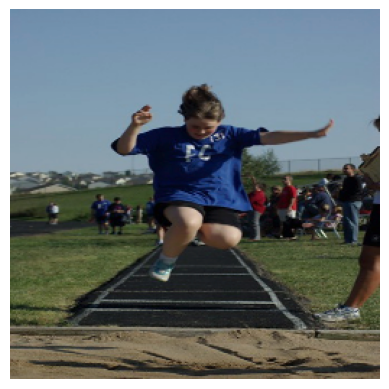

In [3]:
import cv2
import matplotlib.pyplot as plt


data_iter = iter(loader.train_data)
first_image = next(data_iter)

first_image_tensor = first_image[0] 
first_image_np = first_image_tensor.permute(1, 2, 0).numpy()

first_image_np = cv2.cvtColor(first_image_np.astype('uint8'), cv2.COLOR_LAB2RGB)

plt.imshow(first_image_np)
plt.axis('off')
plt.show()